<a href="https://colab.research.google.com/github/rediahmds/eco-sort/blob/main/train/yolov8-ecosort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

EcoSort is an IoT devices that classifies waste with the help of YOLOv8.

This notebook written based on:

- [How to Train YOLOv8 Object Detection on a Custom Dataset](https://blog.roboflow.com/how-to-train-yolov8-on-a-custom-dataset/)
- [Train YOLOv8 on Custom Dataset – A Complete Tutorial](https://learnopencv.com/train-yolov8-on-custom-dataset/)

> Note: Run this notebook on Google Colab to eliminate basic setups.

## Tech Stack

- Python v3.12
- ESP32
- Blynk

## Setup

We are gonna need `ultralytics` and `coreml`.

### Install `ultralytics`

This package provides APIs to interact with the training, models, etc.

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

### Install `clearml`

Used to monitor deep learning experiments. YOLOv8 integrates nicely with this tool!

In [2]:
!pip install clearml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.10.1
    Uninstalling PyJWT-2.10.1:
      Successfully uninstalled PyJWT-2.10.1


### Setup ClearML Credentials

Go ahead and sign-up/sign-in to [AI Infrastructure Platform | Maximize AI Performance & Scalability | ClearML](https://app.clear.ml/dashboard)

After that, go to Settings `->` Workspace `->` Create new credentials

The new credentials will be created and shows two options:

- Local Python (Recommended)
- Jupyter Notebook

Both actually are the same things, it only differs on how to use the new credentials.

This time, use the `clearml` CLI app to consume the credentials, when prompted, paste it.

Now, any YOLOv8 training experiments that you run in this notebook will be logged into ClearML dashboard.

In [3]:
!clearml-init

ClearML SDK setup process

Please create new clearml credentials through the settings page in your `clearml-server` web app (e.g. http://localhost:8080//settings/workspace-configuration) 
Or create a free account at https://app.clear.ml/settings/workspace-configuration

In settings page, press "Create new credentials", then press "Copy to clipboard".

Paste copied configuration here:
api {   # Redi Ahmad Supriyatna's workspace   web_server: https://app.clear.ml/   api_server: https://api.clear.ml   files_server: https://files.clear.ml   credentials {     "access_key" = "C7FZXM9P8MN5OYF86KWUOM3R12WHLF"     "secret_key" = "rPnhLmVV02D8TqnCraz6qTFKljGns1LdXcODtiHAa-nW88Irzy5gjf44YPYFaqDCpvo"   } }
Detected credentials key="C7FZXM9P8MN5OYF86KWUOM3R12WHLF" secret="rPnh***"

ClearML Hosts configuration:
Web App: https://app.clear.ml/
API: https://api.clear.ml
File Store: https://files.clear.ml

Verifying credentials ...
Credentials verified!

New configuration stored in /root/clearml.conf
Cl

## Download the dataset

This time, use `roboflow` package to download the dataset.

Datasets:

- [Sampah Dataset > Overview](https://universe.roboflow.com/23222311-haidaravi-ardi-dis8z/sampah-t92ox)

Kudos and big thanks to the dataset creators.

In [4]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [6]:
from roboflow import Roboflow

# Use API KEY from roboflow
rf = Roboflow(api_key="API_KEY")
project = rf.workspace("23222311-haidaravi-ardi-dis8z").project("sampah-t92ox")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Sampah-1 in yolov8:: 100%|██████████| 2794/2794 [00:00<00:00, 7526.00it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Train

Choose model variants

100%|██████████| 6.25M/6.25M [00:00<00:00, 138MB/s]


Ultralytics 8.3.138 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Sampah-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8-ecosort.pt, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine

100%|██████████| 755k/755k [00:00<00:00, 123MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 285MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 943.3±340.6 MB/s, size: 32.4 KB)


train: Scanning /content/Sampah-1/train/labels... 1080 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1080/1080 [00:00<00:00, 2398.30it/s]

train: New cache created: /content/Sampah-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 9, len(boxes) = 3209. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 416.7±129.9 MB/s, size: 41.5 KB)


val: Scanning /content/Sampah-1/valid/labels... 207 images, 0 backgrounds, 0 corrupt: 100%|██████████| 207/207 [00:00<00:00, 1482.11it/s]

val: New cache created: /content/Sampah-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 525. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/yolov8-ecosort.pt/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8-ecosort.pt
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.13G      1.326       2.05      1.445         81        640: 100%|██████████| 135/135 [00:25<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.49it/s]

                   all        207        525      0.554      0.443      0.446      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.35G      1.402      1.692      1.475         34        640: 100%|██████████| 135/135 [00:21<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.70it/s]

                   all        207        525      0.487      0.404      0.391      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.37G      1.449       1.68      1.523         72        640: 100%|██████████| 135/135 [00:20<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.05it/s]

                   all        207        525      0.585       0.45      0.457      0.248



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.38G      1.452      1.626      1.513         29        640: 100%|██████████| 135/135 [00:21<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.25it/s]


                   all        207        525      0.508      0.459      0.456      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       1.4G      1.429      1.498      1.492         31        640: 100%|██████████| 135/135 [00:21<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.57it/s]

                   all        207        525      0.632      0.426      0.493      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.42G      1.419      1.431      1.502         83        640: 100%|██████████| 135/135 [00:22<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.80it/s]

                   all        207        525       0.73      0.515        0.6       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.43G       1.37      1.343      1.456         42        640: 100%|██████████| 135/135 [00:22<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.00it/s]

                   all        207        525      0.678      0.494      0.535      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.45G      1.354      1.294      1.452         35        640: 100%|██████████| 135/135 [00:21<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.92it/s]

                   all        207        525      0.626      0.487      0.471       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.47G      1.331      1.264      1.447         28        640: 100%|██████████| 135/135 [00:22<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.95it/s]

                   all        207        525      0.598       0.55      0.582      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.48G      1.315      1.211      1.437         32        640: 100%|██████████| 135/135 [00:20<00:00,  6.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.53it/s]


                   all        207        525       0.69      0.559      0.617      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50       1.5G      1.322      1.177      1.427         63        640: 100%|██████████| 135/135 [00:20<00:00,  6.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.10it/s]

                   all        207        525      0.671      0.576      0.613       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.52G       1.29      1.151      1.398         24        640: 100%|██████████| 135/135 [00:22<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.84it/s]

                   all        207        525      0.616      0.541       0.53      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.54G      1.286      1.147      1.407         29        640: 100%|██████████| 135/135 [00:22<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.01it/s]

                   all        207        525      0.691      0.573      0.653      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.55G      1.274      1.095      1.398         45        640: 100%|██████████| 135/135 [00:21<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.06it/s]

                   all        207        525      0.765      0.601      0.672      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.57G      1.289      1.065      1.412         43        640: 100%|██████████| 135/135 [00:22<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.61it/s]

                   all        207        525      0.721      0.528      0.596      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.59G      1.249      1.016      1.383         17        640: 100%|██████████| 135/135 [00:22<00:00,  5.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.96it/s]

                   all        207        525      0.728      0.601      0.639      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       1.6G      1.248      1.039      1.364         26        640: 100%|██████████| 135/135 [00:21<00:00,  6.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.56it/s]

                   all        207        525       0.71      0.583      0.613       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.62G      1.189     0.9738      1.342         69        640: 100%|██████████| 135/135 [00:21<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.12it/s]

                   all        207        525      0.689      0.639      0.646      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.64G      1.218     0.9893      1.353         41        640: 100%|██████████| 135/135 [00:22<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.29it/s]

                   all        207        525      0.836      0.586      0.717      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.65G      1.211      0.912       1.33         43        640: 100%|██████████| 135/135 [00:21<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.63it/s]

                   all        207        525      0.778       0.64      0.713      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.67G      1.179     0.9196      1.323         37        640: 100%|██████████| 135/135 [00:22<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.87it/s]

                   all        207        525       0.79      0.603        0.7      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.69G      1.198     0.9159      1.339         31        640: 100%|██████████| 135/135 [00:22<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.81it/s]

                   all        207        525      0.807      0.605      0.711      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.71G      1.162     0.8778      1.324         53        640: 100%|██████████| 135/135 [00:21<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.90it/s]

                   all        207        525      0.754      0.627      0.693      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.72G      1.156     0.8602      1.306         35        640: 100%|██████████| 135/135 [00:22<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.83it/s]

                   all        207        525      0.803      0.652      0.729      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.74G      1.146     0.8572      1.302         52        640: 100%|██████████| 135/135 [00:21<00:00,  6.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.49it/s]

                   all        207        525       0.82      0.606      0.698      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.76G      1.146      0.851      1.306         40        640: 100%|██████████| 135/135 [00:20<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.01it/s]

                   all        207        525      0.837      0.598      0.718      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.78G      1.116      0.816      1.284         19        640: 100%|██████████| 135/135 [00:22<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.80it/s]

                   all        207        525      0.731      0.638      0.707      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.79G      1.127     0.8083      1.303         56        640: 100%|██████████| 135/135 [00:22<00:00,  6.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.93it/s]

                   all        207        525      0.825      0.663      0.749      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.81G      1.109     0.7998      1.284         54        640: 100%|██████████| 135/135 [00:21<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.99it/s]

                   all        207        525      0.739       0.65      0.707      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.82G       1.11     0.7909      1.294         62        640: 100%|██████████| 135/135 [00:22<00:00,  6.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.55it/s]

                   all        207        525      0.725      0.665      0.716      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.84G      1.087     0.7709      1.272         32        640: 100%|██████████| 135/135 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.80it/s]

                   all        207        525      0.808      0.621      0.708      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.86G      1.093     0.7756      1.277         34        640: 100%|██████████| 135/135 [00:20<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.19it/s]

                   all        207        525      0.754      0.587      0.652      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.88G      1.077      0.738      1.263         19        640: 100%|██████████| 135/135 [00:21<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.57it/s]

                   all        207        525      0.759      0.667      0.714      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.89G      1.084      0.735      1.257         36        640: 100%|██████████| 135/135 [00:22<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.09it/s]

                   all        207        525      0.778      0.614      0.701      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.91G      1.075     0.7238      1.251         33        640: 100%|██████████| 135/135 [00:22<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.98it/s]

                   all        207        525      0.751      0.624      0.684      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.93G      1.066      0.725       1.25         40        640: 100%|██████████| 135/135 [00:22<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.12it/s]

                   all        207        525      0.801      0.658      0.722      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.95G      1.067     0.7191      1.253         32        640: 100%|██████████| 135/135 [00:22<00:00,  6.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.04it/s]

                   all        207        525      0.812      0.673      0.748      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.96G      1.059     0.6997      1.242         40        640: 100%|██████████| 135/135 [00:21<00:00,  6.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.05it/s]

                   all        207        525       0.78      0.661      0.729       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.98G      1.025     0.6864      1.222         39        640: 100%|██████████| 135/135 [00:21<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  4.98it/s]

                   all        207        525      0.787      0.653      0.736      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         2G      1.005     0.6736       1.22         81        640: 100%|██████████| 135/135 [00:20<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.20it/s]

                   all        207        525      0.736        0.7      0.738      0.517


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.02G     0.9901     0.6159      1.216         27        640: 100%|██████████| 135/135 [00:21<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.86it/s]

                   all        207        525      0.758      0.624      0.693      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.03G     0.9561      0.581      1.202         23        640: 100%|██████████| 135/135 [00:21<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.96it/s]

                   all        207        525      0.782      0.663      0.738      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.05G     0.9647     0.5754      1.204         12        640: 100%|██████████| 135/135 [00:20<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.99it/s]

                   all        207        525        0.8      0.674       0.74      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.07G     0.9256     0.5635      1.184         25        640: 100%|██████████| 135/135 [00:21<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.66it/s]

                   all        207        525      0.786      0.661       0.72      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.08G     0.9267     0.5661      1.182         29        640: 100%|██████████| 135/135 [00:20<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  6.05it/s]


                   all        207        525      0.788      0.662      0.711      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       2.1G     0.9134     0.5451      1.186         28        640: 100%|██████████| 135/135 [00:20<00:00,  6.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.73it/s]

                   all        207        525      0.756      0.689      0.719      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.12G     0.9242     0.5414      1.182         20        640: 100%|██████████| 135/135 [00:21<00:00,  6.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  8.10it/s]

                   all        207        525      0.742       0.69      0.716      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.13G     0.8955     0.5214      1.149         24        640: 100%|██████████| 135/135 [00:21<00:00,  6.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  7.77it/s]

                   all        207        525      0.797      0.657      0.719      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.15G     0.8903     0.5132      1.156         16        640: 100%|██████████| 135/135 [00:20<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:02<00:00,  5.94it/s]

                   all        207        525      0.783      0.667      0.719       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.17G     0.8872     0.5131      1.165         36        640: 100%|██████████| 135/135 [00:20<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:01<00:00,  6.95it/s]

                   all        207        525      0.803      0.654      0.724      0.512



50 epochs completed in 0.332 hours.
Optimizer stripped from runs/detect/yolov8-ecosort.pt/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8-ecosort.pt/weights/best.pt, 6.2MB

Validating runs/detect/yolov8-ecosort.pt/weights/best.pt...
Ultralytics 8.3.138 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:03<00:00,  3.62it/s]


                   all        207        525      0.783      0.664      0.739       0.52
           non_organic         88        226      0.676      0.606      0.629      0.444
               organic        142        299       0.89      0.722      0.849      0.596
Speed: 0.4ms preprocess, 3.5ms inference, 0.0ms loss, 3.6ms postprocess per image
Results saved to runs/detect/yolov8-ecosort.pt
2025-05-18 10:16:09,125 - clearml.storage - INFO - Uploading: 5.96MB to runs/detect/yolov8-ecosort.pt/weights/best.pt


                                            0% | 0.00/5.96 MB [00:00<?, ?MB/s]: 

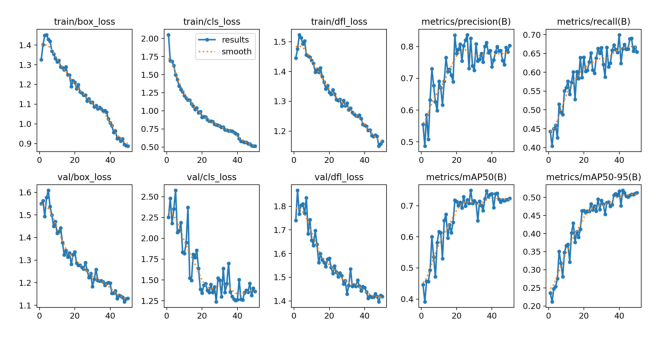

████████████████████████████████▉ 100% | 5.95/5.96 MB [00:00<00:00, 31.44MB/s]: clamping frac to range [0, 1]
█████████████████████████████████ 100% | 5.96/5.96 MB [00:00<00:00, 11.27MB/s]: 

2025-05-18 10:16:09,672 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/Ultralytics/yolov8-ecosort.pt.1e05fd0aae7c4e57a4ba26c75ba90068/models/best.pt


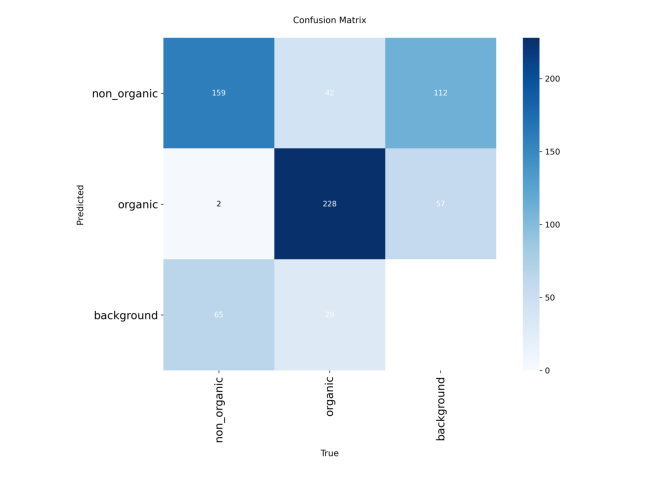

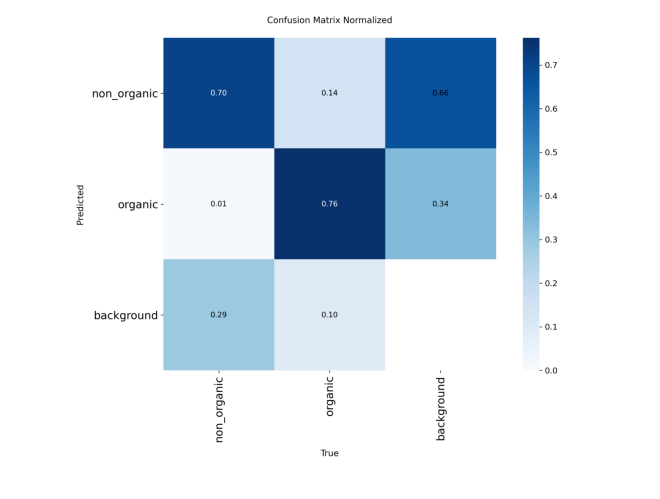

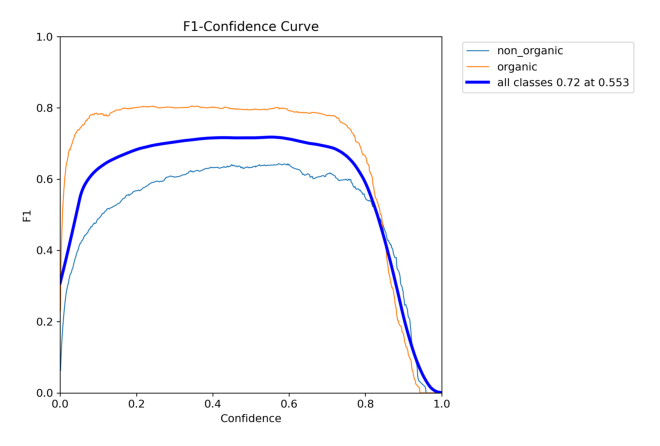

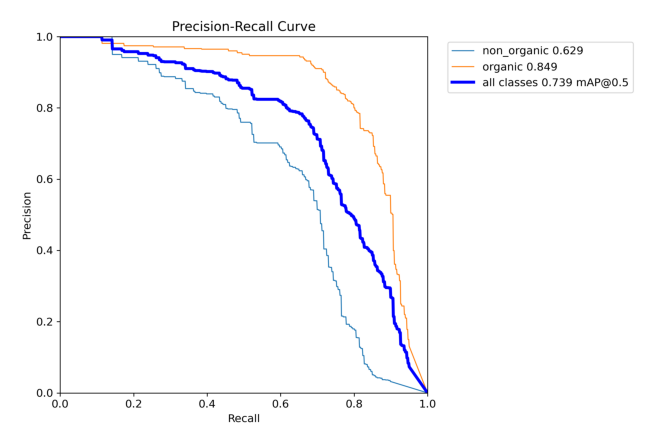

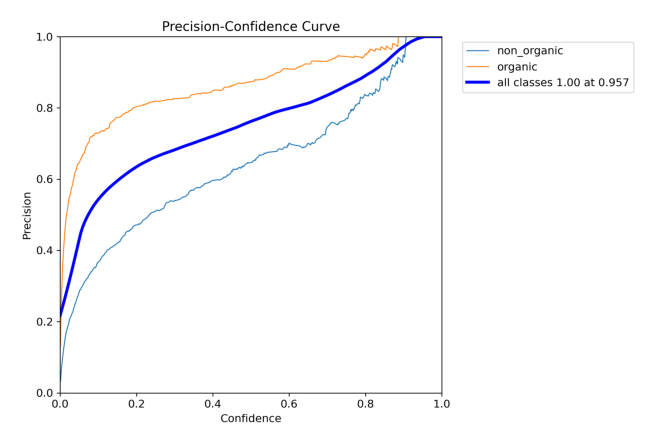

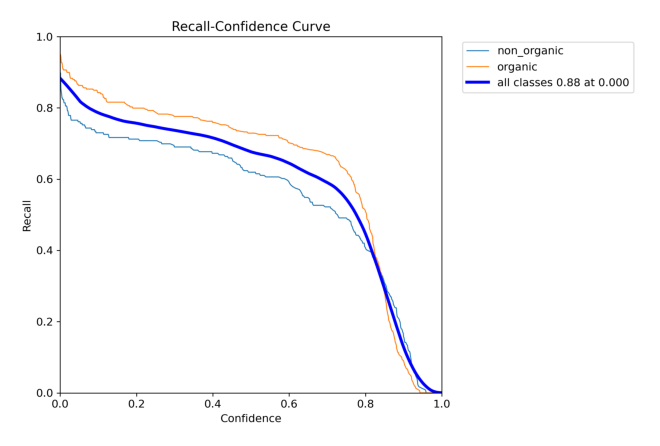

In [7]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

train_results = model.train(
    data="Sampah-1/data.yaml",
    imgsz=640,
    epochs=50,
    batch=8,
    name="yolov8-ecosort.pt"
)